In [1]:
%load_ext autoreload
%autoreload 2
from main import *
from intparams import *
from restop import *

In [2]:
reslist = rtpreader('example/thy.rtp', 'example/cy3.rtp')
print(reslist)

{'NTHY': <restop.resType object at 0x7f154e5fc320>, 'CY3T': <restop.resType object at 0x7f154e5fc208>}


In [3]:
ff = itpreader('example/charmm36.itp', 'example/ffbonded.itp', 'example/ffnonbonded.itp')

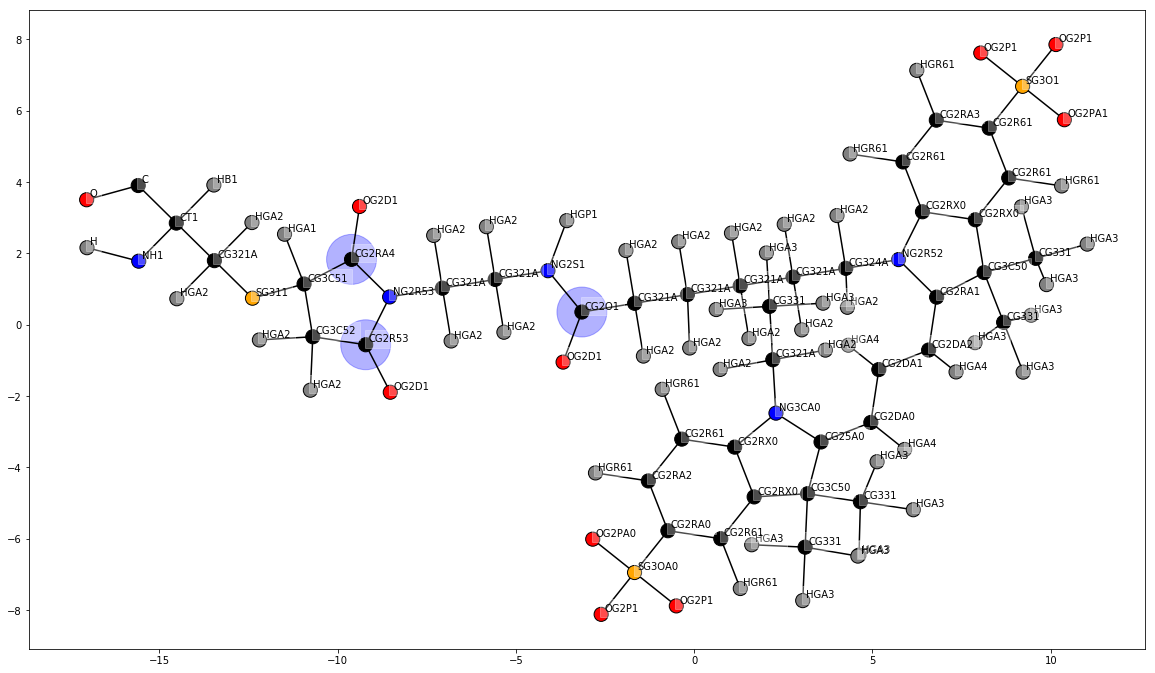

In [4]:
cy3 = reslist['CY3T']
cy3.ff = ff
cy3.Draw(captions = 'types', ShowImpropers = 'rtp', ShowMissingAngles = True, ShowMissingDihedrals = True)

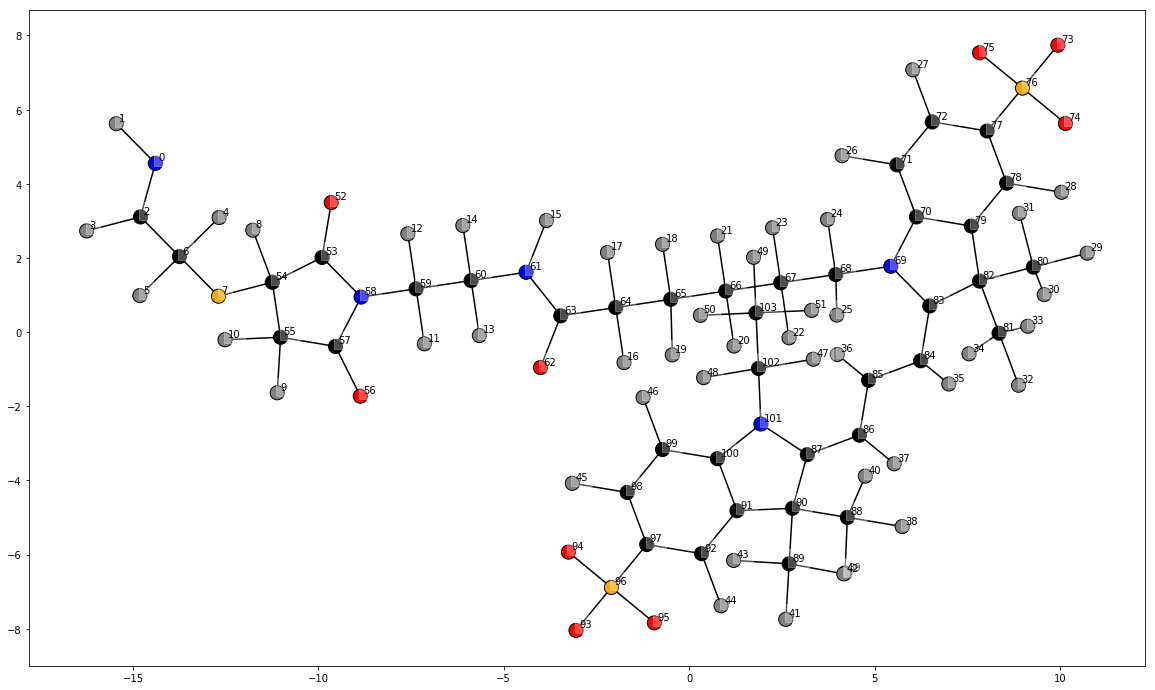

In [5]:
cy3.RemoveAtom(105)
cy3.RemoveAtom(104)
cy3.Draw(captions = 'numbers')

In [6]:
cy3.AddAttachedAtom('CE1', 'C', 'CT3', idx2bond = 2, order = 'single')

NameError: name 'write' is not defined

In [ ]:
cy3.AddAttachedAtom('CLQ1', 'C', 'CT3', idx2bond = 2, order = 'single')
cy3.AddAttachedAtom('HLQ1', 'H', 'HGA3', idx2bond = 104)
cy3.AddAttachedAtom('HLQ2', 'H', 'HGA3', idx2bond = 104)
cy3.AddAttachedAtom('HLQ3', 'H', 'HGA3', idx2bond = 104)

In [ ]:
cy3.Draw(captions = 'names', ShowMissingDihedrals = True, ShowMissingBonds = True, ShowMissingAngles = True)

In [ ]:
cy3.name = "CY35"
cy3.WriteRtp()
cy3.WriteSuppBonded()

In [ ]:
cy3.WriteExtraFF()
for bond in cy3.extraff.Bonded.bonds:
    print(bond)

In [ ]:
cy3.SetBondParams(('CT3', 'HGA3'), f = 4, b0 = 1.432)
cy3.WriteSuppBonded()